# Requirements


*   A folder with:
     * a subfolder with the transcription files
     * and a CSV file with the metadata




# Type of information retrieved here


*   Number of utterances, tonal units, and tokens in all speech (patients, doctors, and companions) and by file (patients, doctors, and companions).
*   Only with patient speeches: Number of disfluencies per utterance, number of disfluencies per tonal unit, number of disfluencies per patient.
*   Number of utterances, tonal units, and tokens in patient speeches and per patient.
*   Number and location of disfluency by disfluency type for each patient and for all patients.
*   Number of disfluencies by disfluency type for each patient and for all patients.
*   Plot showing the number of disfluencies (excluding interrupted utterances) by position.
*   Function that generates plots to visualize the number of tokens and/or number of disfluencies based on a variable (sex, education, etc.).
*   Plot of disfluencies by negative, positive, and general categories.
*   Plot of the number of disfluencies by the number of tokens.
*   A table where each row represents a patient: Unique patient ID, age, sex, education, medications, psychopathologies, number of tokens, total number of disfluencies, number of interrupted words, number of retractions, number of interrupted utterances, number of disfluencies at the beginning, number of disfluencies in the middle, number of disfluencies at the end, number of words before interruption.


# Preparation

In [1]:
# connect google drive to this collab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing libraries
import glob
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# creating a txt file with the corpus information
with open("corpus_information.txt", "w") as corpus_info_txt:
  corpus_info_txt.write("C-ORAL-ESQ SAMPLE INFORMATION\n============\n\n")

In [5]:
# reading metadata
metadata = pd.read_csv('/content/drive/MyDrive/JVPESSOA D.&L CONSULTING/consultorias/c-oral-esq/metadata_coralesq_new.csv')

In [6]:
transcriptionPath = '/content/drive/MyDrive/JVPESSOA D.&L CONSULTING/consultorias/c-oral-esq/transcripts'
# the names of the txt files MUST be the same as the document names in the metadata table file

In [7]:
# getting a list of the paths of each file
simpleTranscriptList = glob.glob(f'{transcriptionPath}/*.txt')

In [8]:
# checking list
len(simpleTranscriptList)

28

In [9]:
def cleanTranscription(text):
  cleanText = re.sub('\<|\>', "", text)  # Remove angle brackets (<, >) from the text
  # cleanText = re.sub('\n', "", cleanText)  # Optional: Remove newline characters (\n) from the text (currently disabled)
  cleanText = re.sub('^ ', "", cleanText)  # Remove leading spaces from the text
  cleanText = re.sub('\s+$', "", cleanText)  # Remove trailing spaces from the text
  cleanText = re.sub('\s+', " ", cleanText)  # Replace consecutive whitespace characters with a single space
  return cleanText

In [10]:
def createListUtterance(text):
  delimiter_pattern = r"( //|\+)"  # Regular expression pattern to split the text based on delimiters (// or +)
  listOfUnits = re.split(delimiter_pattern, text)  # Split the text into a list of units using the delimiter pattern
  formattedListUtt = ["".join(pair) for pair in zip(listOfUnits[0::2], listOfUnits[1::2])]  # Combine pairs of units into formatted utterances
  return formattedListUtt

In [11]:
def read_preprocessFile(TranscriptionList): #list
    dfList = []  # List to store DataFrames
    newTurnList = []  # List to store processed turn data
    for transcriptionFilePath in TranscriptionList:
        fileOpen = open(transcriptionFilePath, "r", encoding="utf-8") # Open the file for reading
        file_name = os.path.basename(transcriptionFilePath)  # Extract the file name from the path
        file_name = re.sub("\.txt", "", file_name)  # Remove the file extension from the file name
        text = fileOpen.readlines()  # Read all lines of the file into a list
        for turn in text:
            abb = turn.split(":")[0][1:]  # Extract the acronym from the turn by splitting at ":" and removing the leading character (typically "*")
            abb = re.sub("\*", "", abb)  # Remove any remaining asterisks from the acronym
            turnClean = re.sub("\*[A-Z]{3}: ", "", turn)  # Remove the "*ABC: " pattern from the turn using regex
            turnClean = cleanTranscription(turnClean)  # Clean the turn using the cleanTranscription function
            turnClean = re.sub(" +", " ", turnClean)  # Replace multiple consecutive spaces with a single space in the cleaned turn
            newTurnList.append([abb, file_name, turnClean])  # Add the processed turn data (acronym, file name, cleaned turn) to the newTurnList
    textDf = pd.DataFrame(newTurnList, columns=["acronym", "file", "turn"])  # Create a DataFrame from the newTurnList with column names
    dfList.append(textDf)  # Append the DataFrame to the dfList
    allSimpleUttDf = pd.concat(dfList)  # Concatenate all DataFrames in dfList into a single DataFrame
    return allSimpleUttDf  # Return the final DataFrame


In [12]:
all_df = read_preprocessFile(simpleTranscriptList) #applying the function

In [13]:
all_df["utterances"] = all_df.turn.apply(lambda x: createListUtterance(x)) #splitting the turns as a list of tonal utterances

In [14]:
all_df = all_df.explode("utterances") # one row = one utterance

In [15]:
all_df["tonal_units"] = all_df.utterances.str.split((" /(?: |\n)")) #splitting the turns as a list of tonal units

In [16]:
all_df = all_df.explode("tonal_units") # one row = one tonal unit

In [ ]:
all_df[:10] #checking

,acronym,file,turn,utterances,tonal_units
0,ELI,MED014,nossa / é muito tempo // mas cê chegou a fazer...,nossa / é muito tempo //,nossa
0,ELI,MED014,nossa / é muito tempo // mas cê chegou a fazer...,nossa / é muito tempo //,é muito tempo //
0,ELI,MED014,nossa / é muito tempo // mas cê chegou a fazer...,mas cê chegou a fazer o treinamento / então //,mas cê chegou a fazer o treinamento
0,ELI,MED014,nossa / é muito tempo // mas cê chegou a fazer...,mas cê chegou a fazer o treinamento / então //,então //
1,FLA,MED014,eu comecei a fazer / só que eu tive que parar ...,eu comecei a fazer / só que eu tive que parar ...,eu comecei a fazer
1,FLA,MED014,eu comecei a fazer / só que eu tive que parar ...,eu comecei a fazer / só que eu tive que parar ...,só que eu tive que parar no meio //
2,ELI,MED014,como que foi o treinamento //,como que foi o treinamento //,como que foi o treinamento //
3,FLA,MED014,ah / foi / umas palestras //,ah / foi / umas palestras //,ah
3,FLA,MED014,ah / foi / umas palestras //,ah / foi / umas palestras //,foi
3,FLA,MED014,ah / foi / umas palestras //,ah / foi / umas palestras //,umas palestras //


In [ ]:
all_df = all_df[all_df["tonal_units"]!=""]  # Filter out rows where "tonal_units" column is not an empty string
all_df = all_df[all_df["tonal_units"]!="\n"]  # Filter out rows where "tonal_units" column is not a newline character
all_df = all_df[all_df["tonal_units"]!=" "]  # Filter out rows where "tonal_units" column is not a single space

all_df["tonal_units"] = all_df["tonal_units"].str.replace("\n", "")  # Remove newline characters from "tonal_units" column
all_df["tonal_units"] = all_df["tonal_units"].str.replace("//", "")  # Remove "//" characters from "tonal_units" column
all_df["tonal_units"] = all_df["tonal_units"].astype(str)  # Convert "tonal_units" column to string data type

all_df["tonal_units_clean"] = all_df["tonal_units"].str.replace("\<|\>", "")
all_df["tonal_units_clean"] = all_df["tonal_units_clean"].str.replace("\[\/[0-9]\]", "")
all_df["tonal_units_clean"] = all_df["tonal_units_clean"].str.replace("\&he", "")
all_df["tonal_units_clean"] = all_df["tonal_units_clean"].str.replace("\+", "")


all_df["utterances_clean"] = all_df["utterances"].str.replace("\&he", "")
all_df["utterances_clean"] = all_df["utterances_clean"].str.replace("\<|\>", "")
all_df["utterances_clean"] = all_df["utterances_clean"].str.replace("\[\/[0-9]\]", "")
all_df["utterances_clean"] = all_df["utterances_clean"].str.replace("\/\/", "")
all_df["utterances_clean"] = all_df["utterances_clean"].str.replace("\/", "")
all_df["utterances_clean"] = all_df["utterances_clean"].str.replace("\s+", " ")
all_df["utterances_clean"] = all_df["utterances_clean"].str.replace("\+", "")

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
all_df['number_tokens'] = all_df['tonal_units_clean'].apply(lambda x: len(nltk.word_tokenize(x)))
# all_df["tokens"] = all_df["tonal_units_clean"].apply(lambda x: x.split())
# all_df["number_tokens"] = all_df["tokens"].apply(lambda x: len(x)) #getting the number fo tokens per tonal unit

In [ ]:
corpus1_info1 = f"The corpus (patient+doctors+companions) has {all_df['utterances'].nunique()} utterances; {all_df['tonal_units'].nunique()} tonal units; and {all_df['number_tokens'].sum()} tokens in total\n=========\n"
print(corpus1_info1)

The corpus (patient+doctors+companions) has 7832 utterances; 13018 tonal units; and 65301 tokens in total



In [ ]:
corpus1_info2 = f"(patient+doctors+companions)\nthe number of utterances per file is:\n{all_df.groupby('file')['utterances'].nunique()}\n=========\n"
print(corpus1_info2)

(patient+doctors+companions)
the number of utterances per file is:
file
MED002    252
MED003    518
MED004    197
MED005    467
MED007    212
MED008    138
MED010    256
MED011    189
MED012    206
MED013    440
MED014    301
MED015    223
MED016    209
MED017    454
MED018    151
MED019    335
MED020    313
MED021    264
MED022    308
MED023    354
MED024    218
MED025    334
MED026    332
MED028    592
MED029    163
MED030    176
MED031    609
MED032    295
Name: utterances, dtype: int64



In [ ]:
corpus1_info3 = f"(patient+doctors+companions)\nthe number of tonal units per file is:\n{all_df.groupby('file')['tonal_units'].count()}\n=========\n"
print(corpus1_info3)

(patient+doctors+companions)
the number of tonal units per file is:
file
MED002     647
MED003    1436
MED004     359
MED005    1168
MED007     724
MED008     243
MED010     659
MED011     317
MED012     476
MED013     978
MED014     689
MED015     599
MED016     433
MED017     973
MED018     298
MED019     690
MED020     641
MED021     586
MED022     713
MED023     662
MED024     502
MED025     733
MED026     592
MED028    1533
MED029     548
MED030     390
MED031    1396
MED032     788
Name: tonal_units, dtype: int64



In [ ]:
with open("corpus_information.txt", "a") as corpus_info_txt:
  corpus_info_txt.write(corpus1_info1)
  corpus_info_txt.write(corpus1_info2)
  corpus_info_txt.write(corpus1_info3)

In [20]:
def substring_word_percentage(string, substring):
    clean = re.sub("\[\/[0-9]+\]", "", string)  # Remove "[/number]" patterns from the string
    clean = re.sub("\/", "", string)  # Remove "/" characters from the string
    word_count = len(clean.split())  # Count the number of words in the cleaned string
    substring_matches = re.finditer(substring, string)  # Find all matches of the substring in the string
    positions = []  # List to store the positions of substring matches
    if word_count > 1:  # Check if the string has more than one word
        for match in substring_matches:
            start_position = match.start()  # Start position of the substring match
            end_position = match.end()  # End position of the substring match
            substring_length = end_position - start_position  # Length of the substring match
            position = start_position / len(string)  # Calculate the position of the substring match relative to the length of the string
            position = round((position * 100), 2)  # Convert the position to a percentage rounded to 2 decimal places
            positions.append(position)  # Add the position to the positions list
        return positions  # Return the list of positions of substring matches
    else:
        return "one_word"  # Return "one_word" if the string has only one word

In [21]:
def check_disfluency_position(posit):
    if posit == "one_word":
        position = "one_word"
    elif posit < 33.3:
        position = "beginning"
    elif 33.3 < posit < 66.6:
        position = "middle"
    else: # larger than 66.6
        position = "end"
    return position

In [22]:
def find_disfluency(string):
    unit = str(string)
    disfluencies = []

    # Find interrupted words
    matchesInterruptedWord = re.findall("&(?!he)\w+", unit)
    if matchesInterruptedWord: # &(?!he)\w+
        positions = substring_word_percentage(unit, "&(?!he)\w+") # Calculates the positions of the matches using the substring_word_percentage function.
        for position_number, match in zip(positions, matchesInterruptedWord): # Iterates over the positions and matches using zip.
            if not isinstance(position_number, str):
              posicao = check_disfluency_position(position_number) # Determines the position category using the check_disfluency_position function.
              types = "interrupted_word" # Sets the disfluency type as "interrupted_word".
              disfluencies.append(f"{types}, {position_number}, {posicao}") # Appends the disfluency occurrence to the disfluencies list.
            else:
              types = "interrupted_word" # Sets the disfluency type as "interrupted_word".
              disfluencies.append(f"{types}, one_word, one_word") # Appends the disfluency occurrence to the disfluencies list.


    # # Find filled pauses
    matchesFilledPause = re.findall("&he", unit)
    if matchesFilledPause:
        positions = substring_word_percentage(unit, "&he")
        for position_number, match in zip(positions, matchesFilledPause): # Iterates over the positions and matches using zip.
            if not isinstance(position_number, str):
              posicao = check_disfluency_position(position_number) # Determines the position category using the check_disfluency_position function.
              types = "filled_pause" # Sets the disfluency type as "interrupted_word".
              disfluencies.append(f"{types}, {position_number}, {posicao}") # Appends the disfluency occurrence to the disfluencies list.
            else:
              types = "filled_pause" # Sets the disfluency type as "interrupted_word".
              disfluencies.append(f"{types}, one_word, one_word") # Appends the disfluency occurrence to the disfluencies list.

    # # Find retractings
    matchesRetractings = re.findall("\[\/[0-9]\]", unit)
    if matchesRetractings:
        positions = substring_word_percentage(unit, "\[\/[0-9]\]")
        for position_number, match in zip(positions, matchesRetractings): # Iterates over the positions and matches using zip.
            if not isinstance(position_number, str):
              posicao = check_disfluency_position(position_number) # Determines the position category using the check_disfluency_position function.
              types = "retracting" # Sets the disfluency type as "interrupted_word".
              disfluencies.append(f"{types}, {position_number}, {posicao}") # Appends the disfluency occurrence to the disfluencies list.
            else:
              types = "retracting" # Sets the disfluency type as "interrupted_word".
              disfluencies.append(f"{types}, one_word, one_word") # Appends the disfluency occurrence to the disfluencies list.

    # # Find interrupted utterances
    matchesInterruptedUtt = re.findall("\+", unit)
    if matchesInterruptedUtt:
        positions = substring_word_percentage(unit, "\+")
        for position_number, match in zip(positions, matchesInterruptedUtt): # Iterates over the positions and matches using zip.
            if not isinstance(position_number, str):
              posicao = check_disfluency_position(position_number) # Determines the position category using the check_disfluency_position function.
              types = "interrupted_utterance" # Sets the disfluency type as "interrupted_word".
              disfluencies.append(f"{types}, {position_number}, {posicao}") # Appends the disfluency occurrence to the disfluencies list.
            else:
              types = "interrupted_utterance" # Sets the disfluency type as "interrupted_word".
              disfluencies.append(f"{types}, one_word, one_word") # Appends the disfluency occurrence to the disfluencies list.

    return disfluencies


In [23]:
all_df["disfluencies"] = all_df.tonal_units.apply(lambda x: find_disfluency(x)) #applying the function
all_df = all_df.explode("disfluencies") # one row = one disfluency

In [24]:
# Extract the disfluency type from the 'disfluencies' column and assign it to the 'disfluency_type' column
all_df['disfluency_type'] = all_df['disfluencies'].str.split(",", expand=True)[0]

# Extract the disfluency position percentage from the 'disfluencies' column and assign it to the 'disfluency_position_percentage' column
all_df['disfluency_position_percentage'] = all_df['disfluencies'].str.split(",", expand=True)[1]

# Extract the disfluency position from the 'disfluencies' column and assign it to the 'disfluency_position' column
all_df['disfluency_position'] = all_df['disfluencies'].str.split(",", expand=True)[2]


In [25]:
# fill in the NaN values with "no_disfluency"
all_df['disfluencies'] = all_df['disfluencies'].fillna('no_disfluency')
all_df['disfluency_type'] = all_df['disfluency_type'].fillna('no_disfluency')
all_df['disfluency_position_percentage'] = all_df['disfluency_position_percentage'].fillna('no_disfluency')
all_df['disfluency_position'] = all_df['disfluency_position'].fillna('no_disfluency_p')

In [26]:
# Set 'disfluency_position' to "not_applicable" for rows where 'disfluency_type' is 'interrupted_utterance'
all_df.loc[all_df['disfluency_type'] == 'interrupted_utterance', 'disfluency_position'] = "not_applicable"

# Set 'disfluency_position_percentage' to "not_applicable" for rows where 'disfluency_type' is 'interrupted_utterance'
all_df.loc[all_df['disfluency_type'] == 'interrupted_utterance', 'disfluency_position_percentage'] = "not_applicable"


In [27]:
# Add a new column 'words_before_interruption' to the DataFrame
# The value of this column is determined based on the conditions specified in the lambda function
# counting the number of words in interrupted utterances
all_df['words_before_interruption_unit'] = all_df.apply(lambda row: len(row['tonal_units_clean'].split('+')[0].split()) if row['disfluency_type'] == 'interrupted_utterance' else 'not_applicable', axis=1)
all_df['words_before_interruption_utt'] = all_df.apply(lambda row: len(row['utterances_clean'].split('+')[0].split()) if row['disfluency_type'] == 'interrupted_utterance' else 'not_applicable', axis=1)

In [ ]:
all_df[all_df.words_before_interruption_unit!="not_applicable"] # checking

# Merging dataframes

In [28]:
metadata = metadata.fillna("X") #putting Xs in the NaN values
# Set the second row as the new header
metadata.columns = metadata.iloc[0]
# metadata = metadata.iloc[1:]

In [29]:
# Rename the column
metadata = metadata.rename(columns={'Document': 'file'})
metadata = metadata.rename(columns={'Acronymname': 'acronym'})

In [30]:
# all_df.file = all_df.file.str.replace("MED002", "MED_002")
# all_df.file = all_df.file.str.replace("MED004_2", "MED_004")
# Filter rows in dataframe_b based on conditions
# merging the metadata and the texts
filtered_patient = all_df.merge(metadata[metadata['Nature'] == 'Patient'],
                               on=['file', 'acronym'],
                               how='inner')

# Getting info about the patients

In [ ]:
corpus2_info1 = f'''there is {round(len(filtered_patient)/filtered_patient.utterances.nunique(), 2)} disfluencies per utterance
And {round(len(filtered_patient)/filtered_patient.tonal_units.nunique(), 2)} per tonal unit.
And {round(len(filtered_patient)/filtered_patient.file.nunique(), 2)} per patient.\n=========\n'''
print(corpus2_info1)

there is 2.79 disfluencies per utterance
And 1.56 per tonal unit.
And 356.13 per patient.



In [ ]:
corpus2_info2 = f"The corpus (only patients) has {filtered_patient['utterances'].nunique()} utterances; {filtered_patient['tonal_units'].nunique()} tonal units; and {filtered_patient['number_tokens'].sum()} tokens in total\n=========\n"
print(corpus2_info2)

The corpus (only patients) has 2938 utterances; 5242 tonal units; and 33041 tokens in total



In [ ]:
corpus2_info3 = f"(patients)\nthe number of utterances per file/patient is:\n{filtered_patient.groupby('file')['utterances'].nunique()}\n=========\n"
print(corpus2_info3)

(patients)
the number of utterances per file/patient is:
file
MED002    178
MED003    189
MED004    107
MED005    280
MED007    132
MED008     78
MED010    141
MED011     63
MED012     80
MED013    215
MED014    121
MED015    159
MED016     68
MED017    117
MED018     48
MED020    171
MED021    125
MED022     76
MED024     22
MED025    196
MED028    226
MED029     32
MED031    308
Name: utterances, dtype: int64



In [ ]:
corpus2_info4 = f"(patients)\nthe number of tonal units per file/patient is:\n{filtered_patient.groupby('file')['tonal_units'].count()}\n=========\n"
print(corpus2_info4)


(patients)
the number of tonal units per file/patient is:
file
MED002    525
MED003    558
MED004    206
MED005    872
MED007    541
MED008    196
MED010    320
MED011     87
MED012    178
MED013    562
MED014    271
MED015    430
MED016    125
MED017    229
MED018    105
MED020    430
MED021    269
MED022    162
MED024     37
MED025    536
MED028    549
MED029     78
MED031    925
Name: tonal_units, dtype: int64



In [ ]:
filtered_patient['number_tokens'].sum()

33041

In [ ]:
corpus2_info5 = f"(patients)\nthe number of tokens per file/patient is:\n{filtered_patient.groupby('file')['number_tokens'].sum()}\n=========\n"
print(corpus2_info5)

(patients)
the number of tokens per file/patient is:
file
MED002    2236
MED003    1341
MED004     903
MED005    2975
MED007    2318
MED008    1179
MED010    1269
MED011     203
MED012     604
MED013    3375
MED014    1336
MED015    1572
MED016     337
MED017     766
MED018     414
MED020    1778
MED021     982
MED022     327
MED024     112
MED025    3054
MED028    1955
MED029     278
MED031    3727
Name: number_tokens, dtype: int64



In [ ]:
pd.set_option("display.max_rows", None)
corpus2_info6 = f"distribution of disfluency position per patient\n{filtered_patient.groupby('disfluency_position')['file'].value_counts()}\n======\n"
print(corpus2_info6)

distribution of disfluency position per patient
disfluency_position  file  
 beginning           MED013    113
                     MED025    111
                     MED031    108
                     MED005     91
                     MED002     77
                     MED007     74
                     MED003     47
                     MED028     45
                     MED008     43
                     MED020     33
                     MED010     29
                     MED004     26
                     MED014     26
                     MED021     25
                     MED015     18
                     MED012     17
                     MED017     17
                     MED018     15
                     MED022      7
                     MED024      7
                     MED016      6
                     MED029      3
                     MED011      2
 end                 MED031     30
                     MED013     21
                     MED025     20
              

In [ ]:
corpus2_info7 = f"distribution of disfluency type per patient\n{filtered_patient.groupby('disfluency_type')['file'].value_counts()}\n======\n"
print(corpus2_info7)

distribution of disfluency type per patient
disfluency_type        file  
filled_pause           MED010     17
                       MED005     16
                       MED007     12
                       MED025     12
                       MED020     10
                       MED031     10
                       MED003      8
                       MED013      7
                       MED015      6
                       MED002      5
                       MED028      4
                       MED018      3
                       MED029      3
                       MED004      2
                       MED008      2
                       MED012      2
                       MED021      2
                       MED022      1
interrupted_utterance  MED031     57
                       MED025     29
                       MED005     15
                       MED002     13
                       MED013      9
                       MED015      9
                       MED020      9
 

In [ ]:
corpus2_info8 = f"distribution of disfluency type in total\n{filtered_patient.disfluency_type.value_counts()}=\n=======\n"
print(corpus2_info8)

distribution of disfluency type in total
no_disfluency            6197
retracting               1102
interrupted_word          579
interrupted_utterance     191
filled_pause              122
Name: disfluency_type, dtype: int64=



In [ ]:
corpus2_info9 = f"distribution of disfluency position in total\n{filtered_patient.disfluency_position.value_counts()}\n======\n"
print(corpus2_info9)

distribution of disfluency position in total
no_disfluency_p    6197
 beginning          940
 middle             619
not_applicable      191
 end                156
 one_word            88
Name: disfluency_position, dtype: int64



In [32]:
# Define the categories to exclude
excluded_categories = ['no_disfluency_p', 'not_applicable']

# Filter the DataFrame to exclude the categories
df_disfluencies = filtered_patient[~filtered_patient['disfluency_position'].isin(excluded_categories)]

In [ ]:
# Group the data by 'file_name' and 'disfluency_position' and calculate the counts
counts = df_disfluencies.groupby(['file', 'disfluency_position']).size()

# Group the data by 'file_name' and calculate the total counts for each file
total_counts = df_disfluencies.groupby('file').size()

# Calculate the percentage for each 'disfluency_position' in relation to data points of each file
percentage = round((counts / counts.groupby(level=0).sum()) * 100, 2)

In [35]:
# Group the data by 'file_name' and 'disfluency_position' and calculate the counts
counts2 = df_disfluencies.groupby(['disfluency_type', 'disfluency_position']).size()

# Group the data by 'file_name' and calculate the total counts for each file
total_counts2 = df_disfluencies.groupby('file').size()

# Calculate the percentage for each 'disfluency_position' in relation to data points of each file
percentage2 = round((counts2 / counts2.groupby(level=0).sum()) * 100, 2)

In [40]:
percentage2

disfluency_type   disfluency_position
filled_pause       beginning             15.57
                   end                   17.21
                   one_word              67.21
interrupted_word   beginning             61.66
                   end                    7.43
                   middle                29.88
                   one_word               1.04
retracting         beginning             51.18
                   end                    8.35
                   middle                40.47
dtype: float64

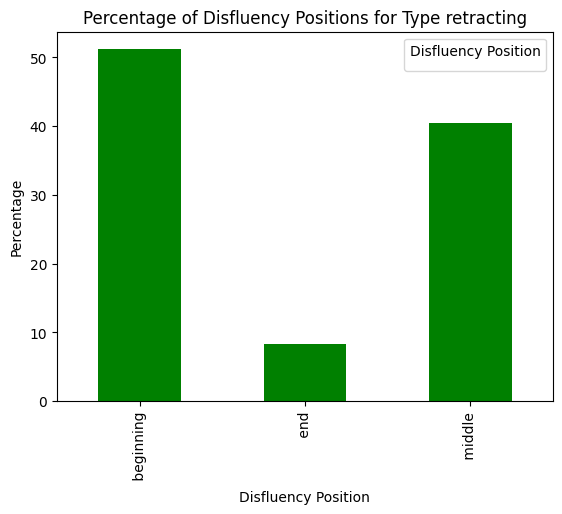

<Figure size 640x480 with 0 Axes>

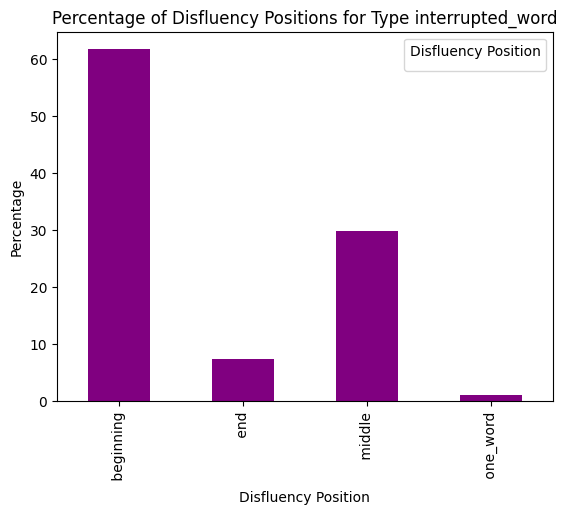

<Figure size 640x480 with 0 Axes>

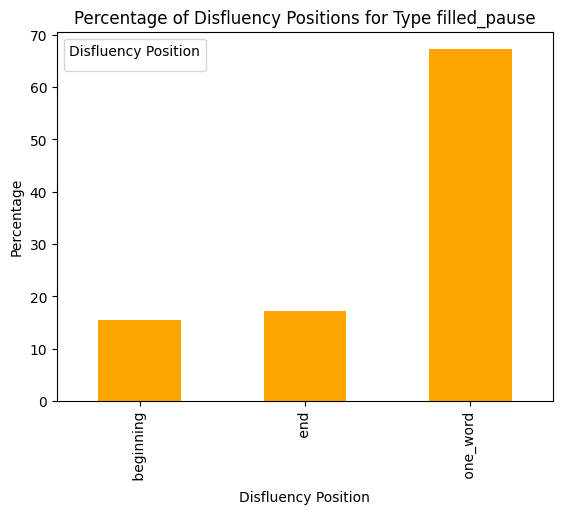

<Figure size 640x480 with 0 Axes>

In [54]:
# Define a list of unique colors for each plot
unique_colors = ['green', 'purple', 'orange', 'cyan']

# Loop through each unique disfluency_type
for idx, disfluency_type in enumerate(df_disfluencies['disfluency_type'].unique()):
    plt.figure()  # Create a new figure for each type
    subset_percentage = percentage2[disfluency_type]  # Get the percentage for the current type

    # Plot the percentage values for each disfluency position with a unique color
    subset_percentage.plot(kind='bar', stacked=True, color=unique_colors[idx])

    plt.xlabel('Disfluency Position')
    plt.ylabel('Percentage')
    plt.title(f'Percentage of Disfluency Positions for Type {disfluency_type}')
    plt.legend(title='Disfluency Position')
    plt.show()
    plt.savefig(f"{disfluency_type}_by_position.png", bbox_inches='tight')

AttributeError: ignored

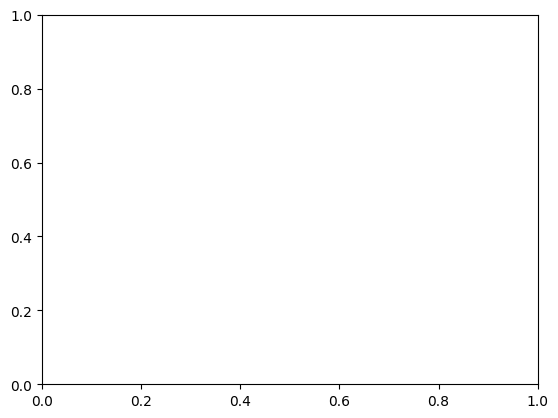

In [41]:
# Plot the values as a line plot with customized labels and title
percentage2.plot(kind='bar',  color='b', columns="disfluency_type" , label='Data Series')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Customized Line Plot')
plt.legend()

# Show the plot
plt.show()

In [ ]:
corpus2_info10 = f"the percentage of disfluency position per patient\n{percentage}\n=========\n"
print(corpus2_info10)

In [ ]:
with open("corpus_information.txt", "a") as corpus_info_txt:
  corpus_info_txt.write(corpus2_info1)
  corpus_info_txt.write(corpus2_info2)
  corpus_info_txt.write(corpus2_info3)
  corpus_info_txt.write(corpus2_info4)
  corpus_info_txt.write(corpus2_info5)
  corpus_info_txt.write(corpus2_info6)
  corpus_info_txt.write(corpus2_info7)
  corpus_info_txt.write(corpus2_info8)
  corpus_info_txt.write(corpus2_info9)
  corpus_info_txt.write(corpus2_info10)

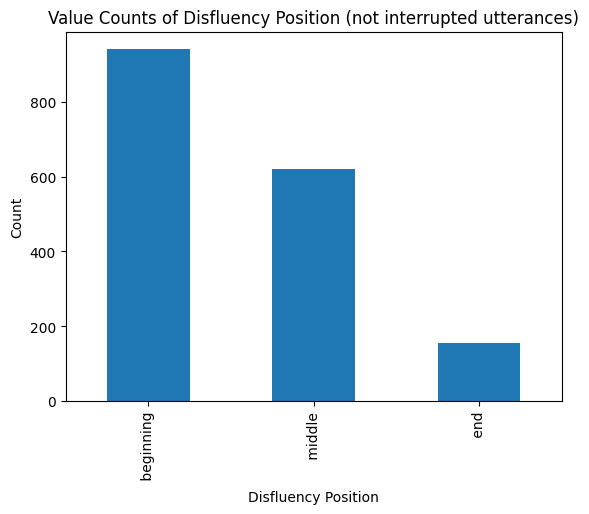

In [ ]:
# Filter specific categories
filtered_data = filtered_patient[filtered_patient.disfluency_position.str.contains("beginning|middle|end")]

# Plot the filtered value counts
filtered_data['disfluency_position'].value_counts().plot(kind='bar')
# # Add labels and title
plt.xlabel('Disfluency Position')
plt.ylabel('Count')
plt.title('Value Counts of Disfluency Position (not interrupted utterances)')
# export figure as a PNG file
plt.savefig(f"disfluency_by_position.png", bbox_inches='tight')
# # # Show the plot
plt.show()

In [ ]:
# Combining personal info about the speakers so that we can retrieve repeated speakers
filtered_patient['combined_person_info'] = filtered_patient[['acronym', 'Agegroup', 'Sex', 'Schooling']].apply(lambda x: '_'.join(x.astype(str).str.replace("\s", "")), axis=1)

<ipython-input-134-32e8afcc0242>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  filtered_patient['combined_person_info'] = filtered_patient[['acronym', 'Agegroup', 'Sex', 'Schooling']].apply(lambda x: '_'.join(x.astype(str).str.replace("\s", "")), axis=1)


In [ ]:
filtered_patient["tonal_units"] = filtered_patient["tonal_units"] + "_endUnit"

# Creating a dataframe (one row = one patient)

In [ ]:
# Group by 'combined_person_info' and aggregate the data
metadataText = filtered_patient.groupby('combined_person_info')[["file", 'tonal_units', 'number_tokens',
       'disfluencies', 'disfluency_type', 'disfluency_position_percentage',
       'disfluency_position', 'words_before_interruption_unit', 'words_before_interruption_utt','Nature',
       'Agegroup', 'Sex', 'Schooling', 'Medicine', 'P1-Delusions',
       'P2-Conceptual Disorganization', 'P3- Hallucinatory Behavior',
       'P4-Excitement', 'P5-Grandiosity', 'P6- Suspisciousness',
       'P7-Hostility', 'SCALE TOTALpositive', 'N1-Afet. Embotada', 'N2-Retraim. Emoc',
       'N3-Contato pobre', 'N4-Retraim. Social', 'N5-Dific. Pens. Abs.',
       'N6-Falta Espontan.', 'N7-Pens. Estereoip.', 'SCALE TOTALnegative',
       'G1-Preocup. Somát', 'G2-Ansiedade', 'G3-Culpa', 'G4-Tensão',
       'G5-Maneirismo', 'G6-Depressão', 'G7-Retardo motor', 'G8-Falta Cooper.',
       'G9-Pens. Incomum', 'G10-Desorientação', 'G11-Défict Atençao',
       'G12-Juízo/Crítica', 'G13-Dist. Volição', 'G14-Mau Contr. Imp',
       'G15-Preocupação', 'G16-Esquiva Social', 'SCALE TOTALgeneral']].agg(lambda x: ' '.join(map(str, x))).reset_index()

In [ ]:
from collections import Counter
# counting the number of tonal units per speaker
metadataText["total_units"] = metadataText['tonal_units'].apply(lambda x: x.split("_endUnit"))
metadataText["total_units"] = metadataText["total_units"].apply(lambda x: len(x))

# counting the number of words per speaker
metadataText["total_tokens"] = metadataText['number_tokens'].apply(lambda x: x.split(" "))
metadataText["total_tokens"] = metadataText["total_tokens"].apply(lambda x: sum(int(i) for i in x))

# counting the number of disfluencies
metadataText["total_disfluencies"] = metadataText['disfluency_type'].apply(lambda x: x.split(" "))
metadataText["total_disfluencies"] = metadataText["total_disfluencies"].apply(lambda x: len(x))

# counting the number of disfluencies
metadataText["total_disfluency_types"] = metadataText['disfluency_type'].apply(lambda x: x.split(" "))
metadataText["total_disfluency_types"] = metadataText["total_disfluency_types"].apply(lambda x:  Counter(x))

In [ ]:
# Expand the dictionaries into separate columns
expanded_data = metadataText['total_disfluency_types'].apply(pd.Series)

# Concatenate the expanded data with the original DataFrame
metadataText = pd.concat([metadataText, expanded_data], axis=1)

In [ ]:
# counting the number of disfluency positions
metadataText["total_disfluency_position"] = metadataText['disfluency_position'].apply(lambda x: x.split())
metadataText["total_disfluency_position"] = metadataText["total_disfluency_position"].apply(lambda x: Counter(x))
# Expand the dictionaries into separate columns
expanded_data = metadataText['total_disfluency_position'].apply(pd.Series)

# Concatenate the expanded data with the original DataFrame
metadataText = pd.concat([metadataText, expanded_data], axis=1)

In [ ]:
# counting the number of words in interrupted utterances
metadataText["total_words_before_interruption"] = metadataText['words_before_interruption_unit'].apply(lambda x: x.split())
metadataText["total_words_before_interruption"] = metadataText['words_before_interruption_unit'].apply(lambda x: sum(int(i) for i in x.split() if i.isnumeric()) if isinstance(x, str) else None)


In [ ]:
# Update specific columns in the 'metadataText' DataFrame
# The values in these columns are modified using the lambda function applied through 'applymap'
# selecting the first item of the list (they're all the same)
metadataText[['Agegroup', 'Sex', 'Schooling', 'Medicine']] = metadataText[['Agegroup', 'Sex', 'Schooling', 'Medicine']].applymap(lambda x: x.split(" ")[0])

In [ ]:
# The values in these columns are modified using the lambda function applied through 'applymap'
# selecting the first item of the list (they're all the same)
metadataText[['Medicine', 'P1-Delusions',
       'P2-Conceptual Disorganization', 'P3- Hallucinatory Behavior',
       'P4-Excitement', 'P5-Grandiosity', 'P6- Suspisciousness',
       'P7-Hostility', 'SCALE TOTALpositive']] = metadataText[['Medicine', 'P1-Delusions',
       'P2-Conceptual Disorganization', 'P3- Hallucinatory Behavior',
       'P4-Excitement', 'P5-Grandiosity', 'P6- Suspisciousness',
       'P7-Hostility', 'SCALE TOTALpositive']].applymap(lambda x: x.split(" ")[0])

In [ ]:
# The values in these columns are modified using the lambda function applied through 'applymap'
# selecting the first item of the list (they're all the same)
metadataText[['file', 'N1-Afet. Embotada', 'N2-Retraim. Emoc', 'N3-Contato pobre']] = metadataText[['file', 'N1-Afet. Embotada', 'N2-Retraim. Emoc',
                                                                                'N3-Contato pobre']].applymap(lambda x: x.split(" ")[0])

metadataText[['N4-Retraim. Social', 'N5-Dific. Pens. Abs.', 'N6-Falta Espontan.', 'N7-Pens. Estereoip.', 'SCALE TOTALnegative']] = metadataText[['N4-Retraim. Social', 'N5-Dific. Pens. Abs.', 'N6-Falta Espontan.', 'N7-Pens. Estereoip.', 'SCALE TOTALnegative']].applymap(lambda x: x.split(" ")[0])

metadataText[['G1-Preocup. Somát', 'G2-Ansiedade', 'G3-Culpa', 'G4-Tensão']]= metadataText[['G1-Preocup. Somát', 'G2-Ansiedade', 'G3-Culpa', 'G4-Tensão']].applymap(lambda x: x.split(" ")[0])

metadataText[['G5-Maneirismo', 'G6-Depressão', 'G7-Retardo motor', 'G8-Falta Cooper.',
       'G9-Pens. Incomum', 'G10-Desorientação', 'G11-Défict Atençao']] = metadataText[['G5-Maneirismo', 'G6-Depressão', 'G7-Retardo motor', 'G8-Falta Cooper.',
                                                                                 'G9-Pens. Incomum', 'G10-Desorientação', 'G11-Défict Atençao']].applymap(lambda x: x.split(" ")[0])

metadataText[['G12-Juízo/Crítica', 'G13-Dist. Volição', 'G14-Mau Contr. Imp',
       'G15-Preocupação', 'G16-Esquiva Social', 'SCALE TOTALgeneral']] = metadataText[['G12-Juízo/Crítica', 'G13-Dist. Volição', 'G14-Mau Contr. Imp',
                                                                          'G15-Preocupação', 'G16-Esquiva Social', 'SCALE TOTALgeneral']].applymap(lambda x: x.split(" ")[0])

In [ ]:
metadataText.columns

Index(['combined_person_info', 'file', 'tonal_units', 'number_tokens',
       'disfluencies', 'disfluency_type', 'disfluency_position_percentage',
       'disfluency_position', 'words_before_interruption_unit',
       'words_before_interruption_utt', 'Nature', 'Agegroup', 'Sex',
       'Schooling', 'Medicine', 'P1-Delusions',
       'P2-Conceptual Disorganization', 'P3- Hallucinatory Behavior',
       'P4-Excitement', 'P5-Grandiosity', 'P6- Suspisciousness',
       'P7-Hostility', 'SCALE TOTALpositive', 'N1-Afet. Embotada',
       'N2-Retraim. Emoc', 'N3-Contato pobre', 'N4-Retraim. Social',
       'N5-Dific. Pens. Abs.', 'N6-Falta Espontan.', 'N7-Pens. Estereoip.',
       'SCALE TOTALnegative', 'G1-Preocup. Somát', 'G2-Ansiedade', 'G3-Culpa',
       'G4-Tensão', 'G5-Maneirismo', 'G6-Depressão', 'G7-Retardo motor',
       'G8-Falta Cooper.', 'G9-Pens. Incomum', 'G10-Desorientação',
       'G11-Défict Atençao', 'G12-Juízo/Crítica', 'G13-Dist. Volição',
       'G14-Mau Contr. Imp', 'G15-

In [ ]:
# selecting columns and creating a new dataframe
patientdisfluencies = metadataText[['file', 'combined_person_info', 'Agegroup', 'Sex', 'Schooling', 'Medicine', 'P1-Delusions', 'total_units',
       'P2-Conceptual Disorganization', 'P3- Hallucinatory Behavior',
       'P4-Excitement', 'P5-Grandiosity', 'P6- Suspisciousness',
       'P7-Hostility', 'SCALE TOTALpositive',
       'N1-Afet. Embotada', 'N2-Retraim. Emoc', 'N3-Contato pobre',
       'N4-Retraim. Social', 'N5-Dific. Pens. Abs.', 'N6-Falta Espontan.',
       'N7-Pens. Estereoip.', 'SCALE TOTALnegative',
       'G1-Preocup. Somát', 'G2-Ansiedade', 'G3-Culpa', 'G4-Tensão',
       'G5-Maneirismo', 'G6-Depressão', 'G7-Retardo motor', 'G8-Falta Cooper.',
       'G9-Pens. Incomum', 'G10-Desorientação', 'G11-Défict Atençao',
       'G12-Juízo/Crítica', 'G13-Dist. Volição', 'G14-Mau Contr. Imp',
       'G15-Preocupação', 'G16-Esquiva Social', 'SCALE TOTALgeneral', 'total_tokens', 'total_disfluencies',
       'total_disfluency_types', 'no_disfluency', 'interrupted_word',
       'retracting', 'interrupted_utterance', 'total_disfluency_position',
       'no_disfluency', 'beginning', 'middle', 'not_applicable', 'end',
       'total_words_before_interruption']]

In [ ]:
# Add a new column 'ratio_disfluency_tokens_percentage' to the 'patientdisfluencies' DataFrame
# The values in this column are calculated based on the ratio of 'total_disfluencies' to 'total_tokens' multiplied by 100
# The result is rounded to 2 decimal places using the 'round' function
patientdisfluencies["ratio_disfluency_tokens_percentage"] = round(patientdisfluencies["total_disfluencies"]/patientdisfluencies["total_tokens"]*100, 2)


<ipython-input-146-f86dd20cd859>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patientdisfluencies["ratio_disfluency_tokens_percentage"] = round(patientdisfluencies["total_disfluencies"]/patientdisfluencies["total_tokens"]*100, 2)


In [ ]:
# deleting the no_disfluency columns
patientdisfluencies = patientdisfluencies.drop(columns='no_disfluency')

In [ ]:
patientdisfluencies.columns #checking

Index(['file', 'combined_person_info', 'Agegroup', 'Sex', 'Schooling',
       'Medicine', 'P1-Delusions', 'total_units',
       'P2-Conceptual Disorganization', 'P3- Hallucinatory Behavior',
       'P4-Excitement', 'P5-Grandiosity', 'P6- Suspisciousness',
       'P7-Hostility', 'SCALE TOTALpositive', 'N1-Afet. Embotada',
       'N2-Retraim. Emoc', 'N3-Contato pobre', 'N4-Retraim. Social',
       'N5-Dific. Pens. Abs.', 'N6-Falta Espontan.', 'N7-Pens. Estereoip.',
       'SCALE TOTALnegative', 'G1-Preocup. Somát', 'G2-Ansiedade', 'G3-Culpa',
       'G4-Tensão', 'G5-Maneirismo', 'G6-Depressão', 'G7-Retardo motor',
       'G8-Falta Cooper.', 'G9-Pens. Incomum', 'G10-Desorientação',
       'G11-Défict Atençao', 'G12-Juízo/Crítica', 'G13-Dist. Volição',
       'G14-Mau Contr. Imp', 'G15-Preocupação', 'G16-Esquiva Social',
       'SCALE TOTALgeneral', 'total_tokens', 'total_disfluencies',
       'total_disfluency_types', 'interrupted_word', 'retracting',
       'interrupted_utterance', 'tota

In [ ]:
patientdisfluencies.groupby("file")["total_disfluencies"].value_counts()

file    total_disfluencies
MED002  525                   1
MED003  558                   1
MED004  206                   1
MED005  872                   1
MED007  541                   1
MED008  196                   1
MED010  320                   1
MED011  87                    1
MED012  178                   1
MED013  562                   1
MED014  271                   1
MED015  430                   1
MED016  125                   1
MED017  229                   1
MED018  105                   1
MED020  430                   1
MED021  269                   1
MED022  162                   1
MED024  37                    1
MED025  536                   1
MED028  549                   1
MED029  78                    1
MED031  925                   1
Name: total_disfluencies, dtype: int64

In [ ]:
# Convert the specified columns to numeric, replacing invalid values with NaN
cols_to_convert = ['SCALE TOTALpositive', 'SCALE TOTALnegative', 'SCALE TOTALgeneral']

# Replace non-finite values with 0
patientdisfluencies[cols_to_convert] = patientdisfluencies[cols_to_convert].apply(pd.to_numeric, errors='coerce')
patientdisfluencies[cols_to_convert] = patientdisfluencies[cols_to_convert].fillna(0)

# Convert the columns to integers
patientdisfluencies[cols_to_convert] = patientdisfluencies[cols_to_convert].astype(int)

# Plotting

In [ ]:
def groupAndPlotSum(df, column_a, column_b, bar_colors = None, file_name = None):
    """
    Groups a pandas DataFrame by the values in column_a, calculates the sum of the
    integer column values from column_b for each group, and returns a bar chart showing
    the sum of each group.

    Parameters:
    -----------
    df : pandas DataFrame
        The DataFrame to be grouped.

    column_a : str
        The name of the column to group by.

    column_b : str
        The name of the column to calculate the sum of.

    Returns: a bar plot, axis x = column_a values; axis y = grouped value
    --------
    None
    """
    columnB = " ".join(column_b.split("_")[1:])
    grouped = round((df.groupby(column_a)[column_b].sum()/df[column_b].sum())*100, 2)
    # grouped = (df.groupby(column_a)[column_b].sum()/df.groupby(column_a)["total_words"].sum())*100
    grouped.plot(kind='bar', color=bar_colors)
    # Set the y-axis tick label format to fixed notation with 2 decimal places
    plt.ticklabel_format(axis='y', style='plain', useOffset=False, useMathText=True)
    plt.title(f"Percentage of {columnB} per {column_a}")
    plt.xlabel(column_a)
    plt.ylabel(f"Percentage of {columnB}")
    plt.savefig(f"{file_name}.png", bbox_inches='tight') #save the chart!
    plt.show()

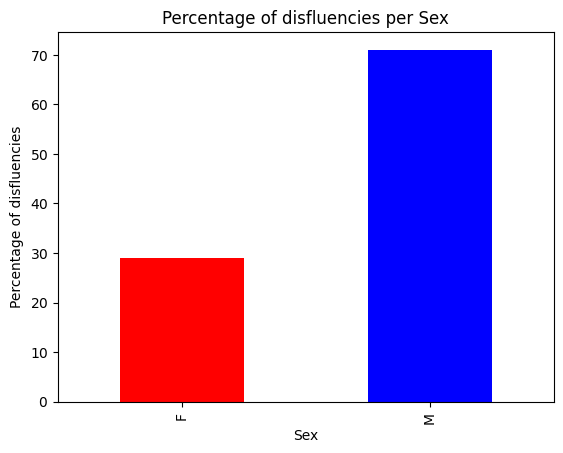

In [ ]:
groupAndPlotSum(patientdisfluencies, "Sex", "total_disfluencies", bar_colors = ["red", "blue"], file_name = "disfluencies_sex")

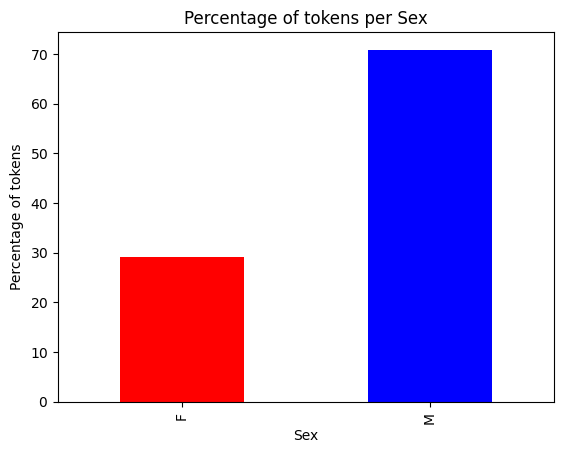

In [ ]:
groupAndPlotSum(patientdisfluencies, "Sex", "total_tokens", bar_colors = ["red", "blue"], file_name = "tokens_sex")

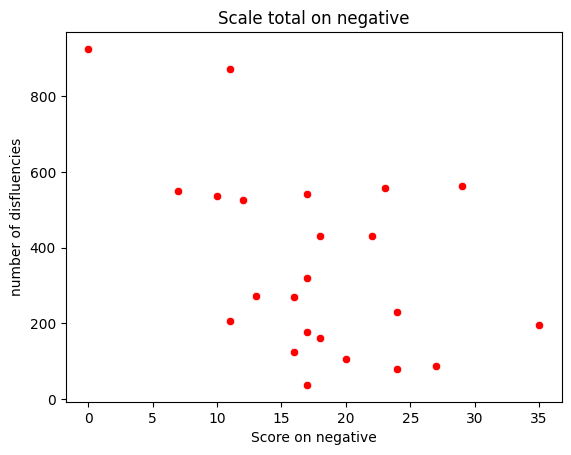

In [ ]:
import seaborn as sns
# Create a scatter plot
sns.scatterplot(x='SCALE TOTALnegative', y='total_disfluencies', data=patientdisfluencies,
                color='red')

# Set labels and title
plt.xlabel('Score on negative')
plt.ylabel('number of disfluencies')
plt.title('Scale total on negative')

# export figure as a PNG file
plt.savefig(f"scoreNegative_numberDisfluencies.png", bbox_inches='tight')

# Show the plot
plt.show()

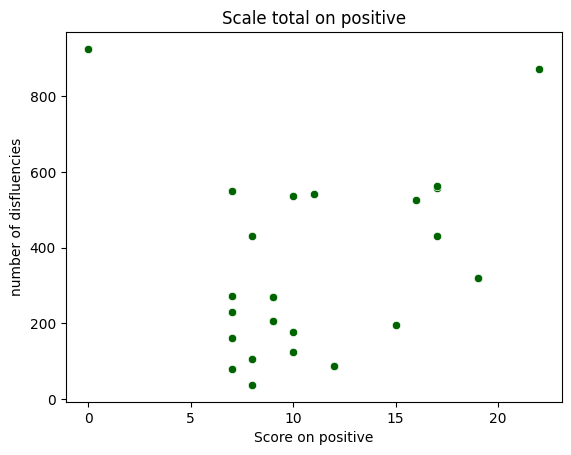

In [ ]:
# Create a scatter plot
sns.scatterplot(x='SCALE TOTALpositive', y='total_disfluencies', data=patientdisfluencies,
                color='darkgreen')

# Set labels and title
plt.xlabel('Score on positive')
plt.ylabel('number of disfluencies')
plt.title('Scale total on positive')

# export figure as a PNG file
plt.savefig(f"scorePositive_numberDisfluencies.png", bbox_inches='tight')

# Show the plot
plt.show()

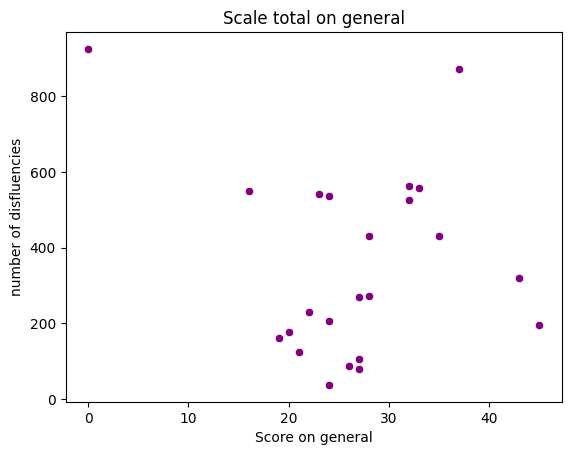

In [ ]:
# Create a scatter plot
sns.scatterplot(x='SCALE TOTALgeneral', y='total_disfluencies', data=patientdisfluencies,
                color='purple')

# Set labels and title
plt.xlabel('Score on general')
plt.ylabel('number of disfluencies')
plt.title('Scale total on general')

# export figure as a PNG file
plt.savefig(f"scoreGeneral_numberDisfluencies.png", bbox_inches='tight')

# Show the plot
plt.show()

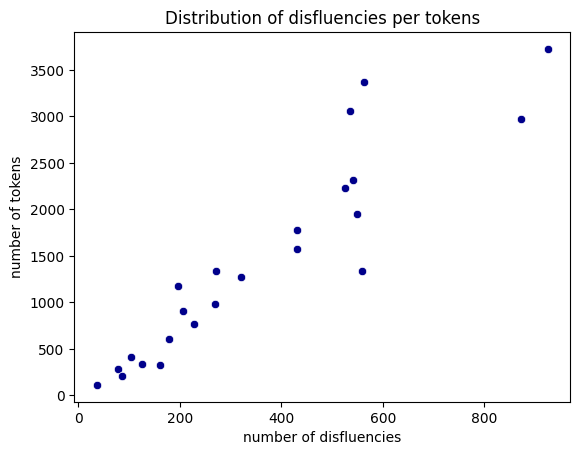

In [ ]:
# Create a scatter plot
sns.scatterplot(x='total_disfluencies', y='total_tokens', data=patientdisfluencies,
                color='darkblue')

# Set labels and title
plt.xlabel('number of disfluencies')
plt.ylabel('number of tokens')
plt.title('Distribution of disfluencies per tokens')

# export figure as a PNG file
plt.savefig(f"numberTokens_numberDisfluencies.png", bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
patientdisfluencies.Medicine.value_counts()

Olanzapine                                                             3
OlanzapineHaloperidolChlorpromazine                                    2
Clozapine                                                              2
OlanzapineFluoxetineLithiumCarbonateLevomepromazine                    1
Quetiapine                                                             1
OlanzipeLamotrigineFluoxetine                                          1
Zuclopentixol                                                          1
RisperidoneQuetiapineLevomepromazine                                   1
RisperidoneChlorpromazineFluoxetineClonazepam                          1
X                                                                      1
OlanzapineValproicAcid                                                 1
RisperidoneChlorpromazineClonazepam                                    1
ClonzapineHaloperidol                                                  1
ValproicAcidClozapineHaloperidolPromethazineChlorpr

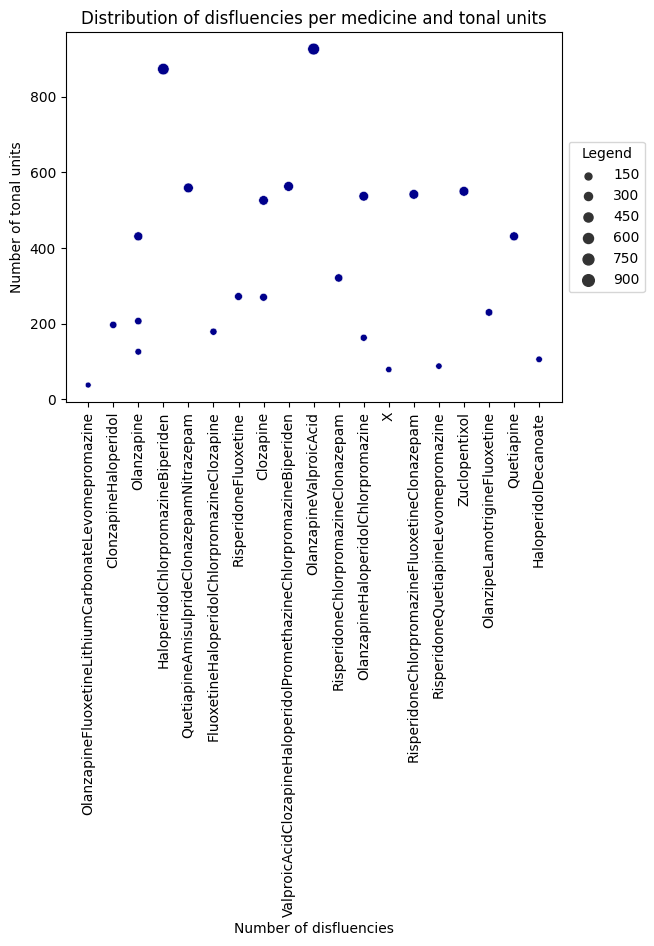

In [ ]:
# Create a scatter plot
sns.scatterplot(x='Medicine', y='total_units', size = "total_disfluencies", data=patientdisfluencies,
                color='darkblue')

# Set labels and title
plt.xlabel('Number of disfluencies')
plt.ylabel('Number of tonal units')
plt.title('Distribution of disfluencies per medicine and tonal units')
# Set legend position
plt.legend(title='Legend', bbox_to_anchor=(1, 0.5), loc='center left')

# Rotate x-axis labels
plt.xticks(rotation=90)

# export figure as a PNG file
plt.savefig(f"medicines_numberUnits_numberDisfluencies.png", bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
# subdataframes to plot the interruptions
filtered_patient_toplot_interruption = filtered_patient[filtered_patient['disfluencies']!="no_disfluency"]
filtered_patient_toplot_interruption = filtered_patient_toplot_interruption[filtered_patient_toplot_interruption['words_before_interruption_utt']!="not_applicable"]
filtered_patient_toplot_interruption = filtered_patient_toplot_interruption[filtered_patient_toplot_interruption['words_before_interruption_utt']>0]
filtered_patient_toplot_interruption2 = filtered_patient_toplot_interruption[filtered_patient_toplot_interruption['words_before_interruption_unit']!="not_applicable"]
filtered_patient_toplot_interruption2 = filtered_patient_toplot_interruption[filtered_patient_toplot_interruption['words_before_interruption_unit']>0]

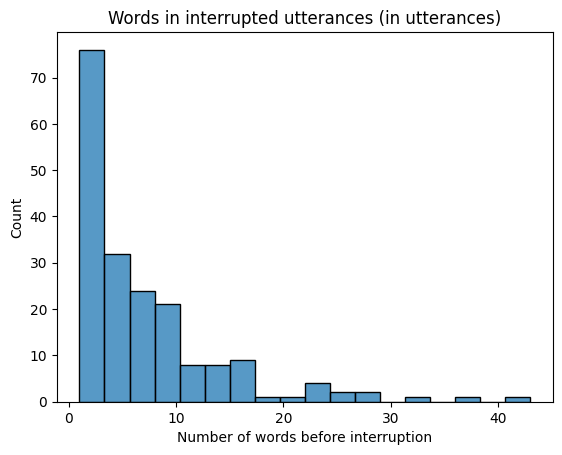

In [ ]:
# create a histogram
sns.histplot(data=filtered_patient_toplot_interruption, x='words_before_interruption_utt')

# Set labels and title
plt.xlabel('Number of words before interruption')
# plt.ylabel('Number of tokens')
plt.title('Words in interrupted utterances (in utterances)')

# export figure as a PNG file
plt.savefig(f"words_interrupteUtt_utterances.png", bbox_inches='tight')

# Show the plot
plt.show()

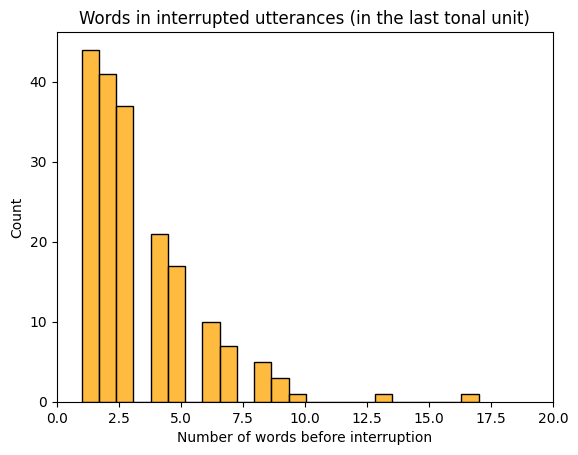

In [ ]:
# create a histogram
sns.histplot(data=filtered_patient_toplot_interruption2, x='words_before_interruption_unit', color = "orange")

# Set labels and title
plt.xlabel('Number of words before interruption')
# plt.ylabel('Number of tokens')
plt.title('Words in interrupted utterances (in the last tonal unit)')
# Adjust the x-axis scale
plt.xlim(0, 20)  # Specify the desired lower and upper limits
# export figure as a PNG file
plt.savefig(f"words_interrupteUtt_tonalUnits.png", bbox_inches='tight')

# Show the plot
plt.show()

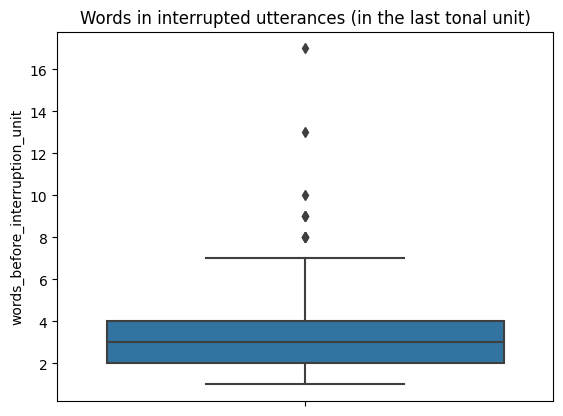

In [ ]:
sns.boxplot(data=filtered_patient_toplot_interruption2, y='words_before_interruption_unit')


# put a title
plt.title('Words in interrupted utterances (in the last tonal unit)')

# export figure as a PNG file
plt.savefig(f"words_interrupteUtt_tonalUnit_boxplot.png", bbox_inches='tight')

plt.show()

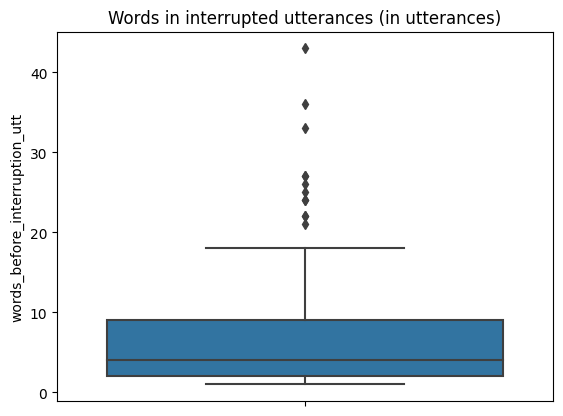

In [ ]:
sns.boxplot(data=filtered_patient_toplot_interruption, y='words_before_interruption_utt')


# put a title
plt.title('Words in interrupted utterances (in utterances)')

# export figure as a PNG file
plt.savefig(f"words_interrupteUtt_utterances_boxplot.png", bbox_inches='tight')

plt.show()